In [1]:
import numpy as np
import logging
import pandas as pd
from copy import deepcopy as cp

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import heart_disease.plotting as hdp
import heart_disease.preprocessing as hdpp
import heart_disease.parameter_optimization as hdpo
from heart_disease.globals import code_path, raw_data_path, data_path, output_path, plot_path

import seaborn as sns

sns.set_context("paper", rc={"font.size":28,
                             "axes.titlesize":32,
                             "axes.labelsize":25,
                             "axes.ticksize":20,
                             'lines.markersize':30,
                             'lines.linewidth':10,
                             'legend.fontsize': 20,
                             'legend.loc':'lower right',
                             })

label_axissize = 25
plot_size = 10

%load_ext autoreload
%autoreload 2

In [2]:
LOG_FMT = '%(asctime)s|%(name)s|%(levelname)s|%(message)s'
logging.basicConfig(level=logging.DEBUG, format=LOG_FMT)
logger = logging.getLogger(__name__)

In [3]:
# Get Metadata
meta_data_df = pd.read_csv(data_path+'meta_data.csv')
meta_data_df.head()

,name,datatype,description,id
0,age,numeric,age in years,3
1,sex,bool,sex (1 = male; 0 = female),4
2,cp,categorical,chest pain type\r -- Value 1: typical angina...,9
3,trestbps,numeric,resting blood pressure (in mm Hg on admission ...,10
4,chol,numeric,serum cholestoral,12


In [4]:
# Import Raw Data
data_file_name_str = 'train_validation.cleveland.csv'
data_df = hdpp.load_data(data_path+data_file_name_str)
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ispos_truth
pat_id,,,,,,,,,,,,,,
162,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,False
18,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,False
100,45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0,False
78,48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0.0,3.0,False
262,60.0,0.0,1.0,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,False


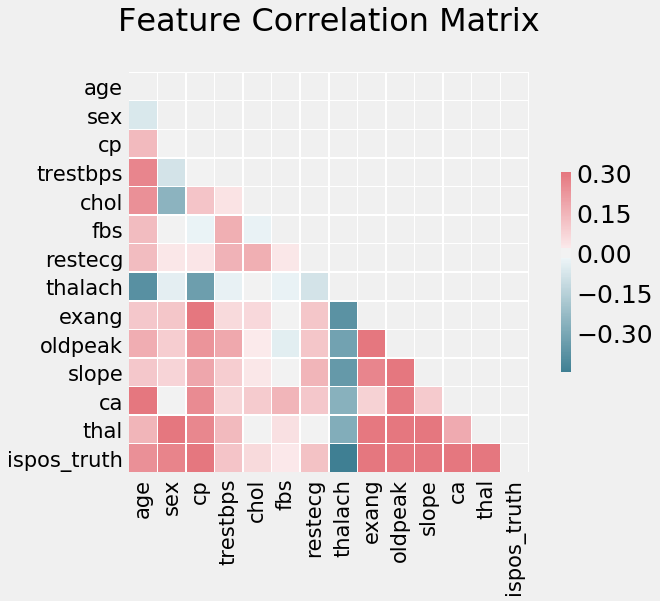

In [5]:
hdp.correlation_matrix(data_df)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=label_axissize)
plt.title("Feature Correlation Matrix\n")
plt.tick_params(labelsize=21)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.savefig(plot_path + 'correlation.png')
plt.show()

In [6]:
clean_df = hdpp.DataCleaner(data_path+'meta_data.csv').get_clean_dataframe(data_df)

In [7]:
clean_df.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_is1,cp_is2,...,slope_is1,slope_is2,slope_is3,ca_is0,ca_is1,ca_is2,ca_is3,thal_is3,thal_is6,thal_is7
0,-0.056774,-1.287754,-0.616740,0.327936,0.449032,-1.467235,-0.426956,-0.667727,-0.293470,-0.412436,...,-0.944281,1.107019,-0.29347,0.856052,-0.531494,-0.405096,-0.256374,0.919526,-0.225668,-0.833085
1,-0.717684,-0.115660,0.517089,-0.503080,-0.715885,-1.467235,-0.426956,-0.667727,-0.293470,-0.412436,...,1.059007,-0.903327,-0.29347,0.856052,-0.531494,-0.405096,-0.256374,0.919526,-0.225668,-0.833085
2,-1.048139,-0.994731,0.238279,1.508854,-0.882301,0.681554,-0.426956,-0.667727,-0.293470,-0.412436,...,1.059007,-0.903327,-0.29347,0.856052,-0.531494,-0.405096,-0.256374,0.919526,-0.225668,-0.833085
3,-0.717684,-0.115660,-0.040532,1.290165,-0.715885,0.681554,-0.426956,-0.667727,-0.293470,2.424621,...,-0.944281,1.107019,-0.29347,0.856052,-0.531494,-0.405096,-0.256374,0.919526,-0.225668,-0.833085
4,0.604136,1.056434,-0.133469,0.896526,-0.133427,-1.467235,-0.426956,-0.667727,3.407508,-0.412436,...,1.059007,-0.903327,-0.29347,0.856052,-0.531494,-0.405096,-0.256374,0.919526,-0.225668,-0.833085


In [8]:
summary_df = hdpo.load_grid_search_summary()
summary_df.head()

,mean_test_score,std_test_score,mean_train_score,std_train_score,params,algorithum,sigma_low_test_score,sigma_low_train_score,rank
488,0.863158,0.038115,0.874353,0.013401,"{'classifier__C': 1.0, 'classifier__gamma': 0....",SVC,0.825043,0.860952,0
495,0.863158,0.038115,0.874353,0.013401,"{'classifier__C': 1.0, 'classifier__gamma': 0....",SVC,0.825043,0.860952,1
494,0.863158,0.038115,0.874353,0.013401,"{'classifier__C': 1.0, 'classifier__gamma': 0....",SVC,0.825043,0.860952,2
661,0.862456,0.038654,0.871294,0.014051,"{'classifier__C': 10.0, 'classifier__gamma': 0...",SVC,0.823802,0.857243,3
830,0.862456,0.038971,0.874118,0.012561,"{'classifier__C': 100.0, 'classifier__gamma': ...",SVC,0.823485,0.861556,4


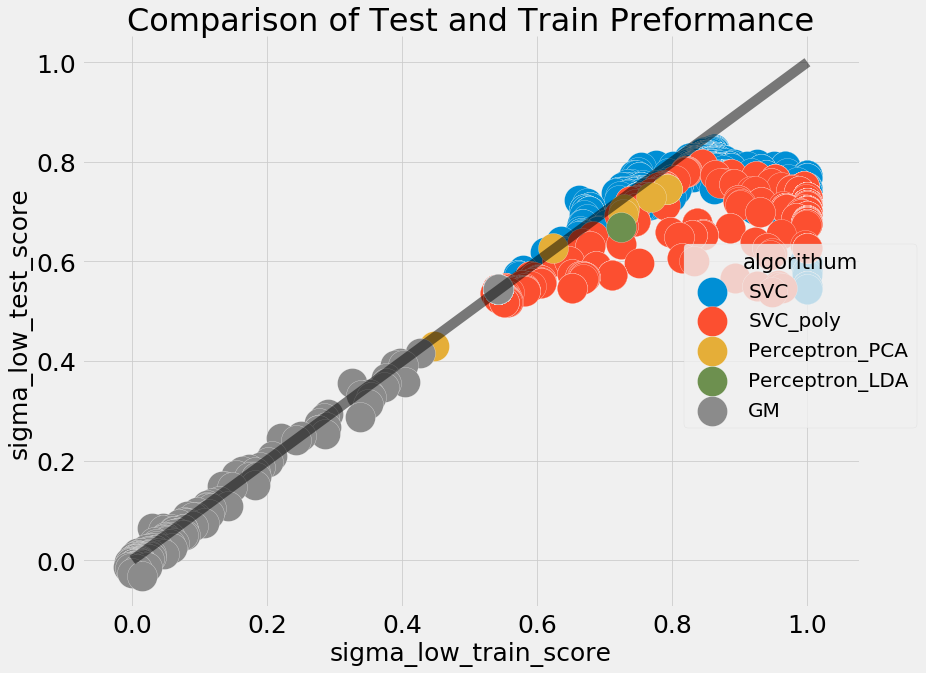

In [9]:
g = sns.pairplot(x_vars=["sigma_low_train_score"], 
             y_vars=["sigma_low_test_score"], data=summary_df, hue="algorithum", size=plot_size)


plt.plot([0,1],[0,1],c='k',alpha=0.5)
plt.title("Comparison of Test and Train Preformance")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'pref_compare_test_train.png')
plt.show()

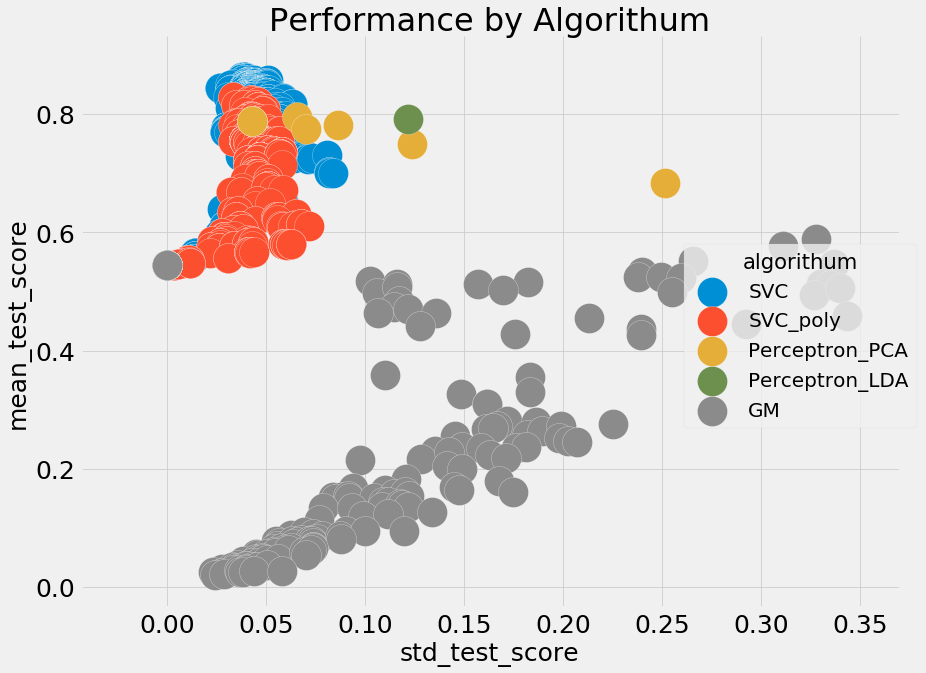

In [10]:
sns.pairplot(x_vars=["std_test_score"], y_vars=["mean_test_score"], data=summary_df, hue="algorithum", size=plot_size)
plt.title("Performance by Algorithum")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'pref_by_alg.png')
plt.show()

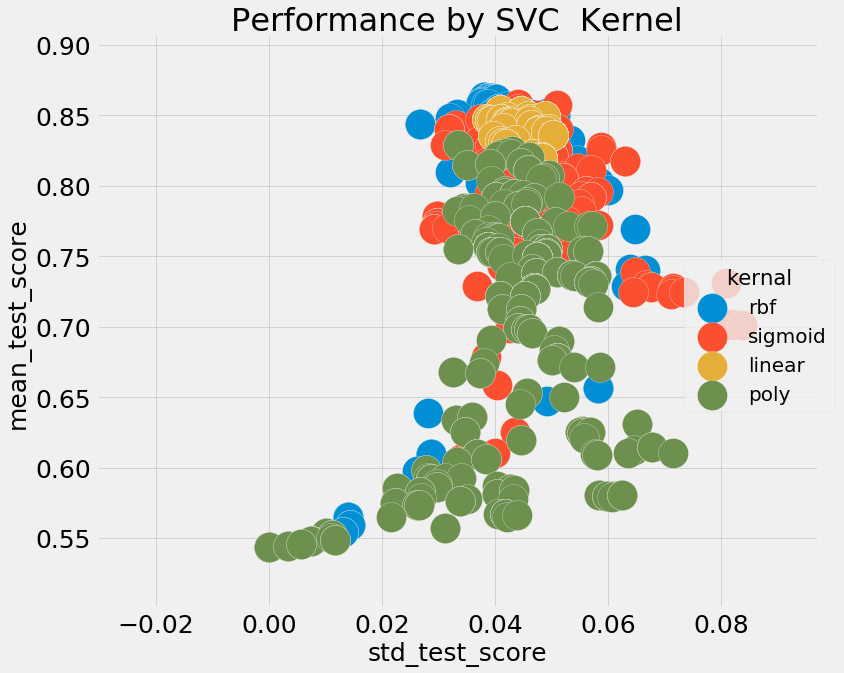

In [11]:
mod_df = cp(summary_df)
mod_df['kernal'] = mod_df['params'].apply(lambda x: x.get('classifier__kernel',np.nan))
mod_df = mod_df[~mod_df['kernal'].isnull()]
sns.pairplot(x_vars=["std_test_score"], y_vars=["mean_test_score"], data=mod_df, hue="kernal", 
             size=plot_size)
plt.title("Performance by SVC  Kernel")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'pref_svc_kernel.png')
plt.show()

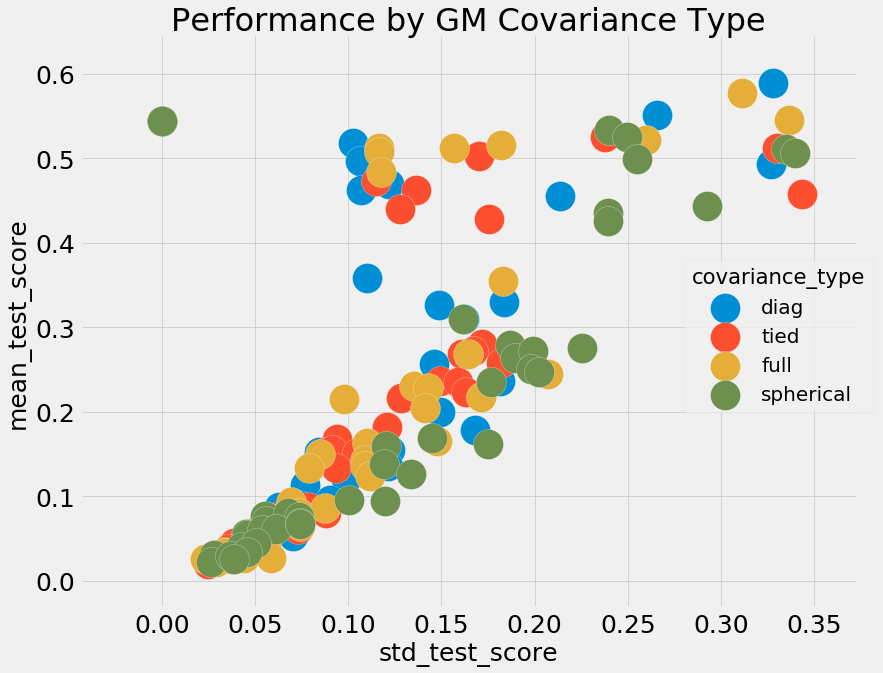

In [12]:
mod_df = cp(summary_df)
mod_df['covariance_type'] = mod_df['params'].apply(lambda x: x.get('classifier__covariance_type',np.nan))
mod_df = mod_df[~mod_df['covariance_type'].isnull()]
sns.pairplot(x_vars=["std_test_score"], 
             y_vars=["mean_test_score"], 
             data=mod_df, 
             hue="covariance_type", 
             size=plot_size)
plt.title("Performance by GM Covariance Type")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'pref_gm_cov.png')
plt.show()

mod_df = cp(summary_df)
mod_df['kernal'] = mod_df['params'].apply(lambda x: x.get('classifier__kernel',np.nan))
mod_df['C'] = mod_df['params'].apply(lambda x: x.get('classifier__C',np.nan))
mod_df['gamma'] = mod_df['params'].apply(lambda x: x.get('classifier__gamma',np.nan))

mod_df = mod_df[~mod_df['kernal'].isnull()]
mod_df = mod_df[mod_df['mean_test_score']> 0.8]
sns.pairplot(x_vars=["C"], y_vars=["gamma"], data=mod_df, hue="kernal", size=plot_size)
plt.tight_layout()
plt.show()

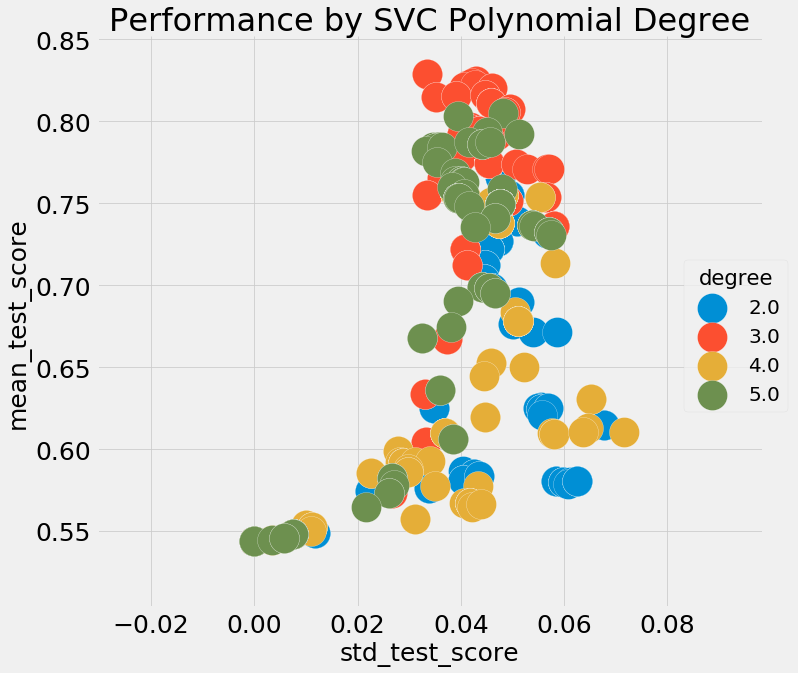

In [13]:
mod_df = cp(summary_df)
mod_df['degree'] = mod_df['params'].apply(lambda x: x.get('classifier__degree',np.nan))

sns.pairplot(x_vars=["std_test_score"], y_vars=["mean_test_score"], data=mod_df, hue="degree", size=plot_size)
plt.title("Performance by SVC Polynomial Degree")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'SVC_degree.png')
plt.show()

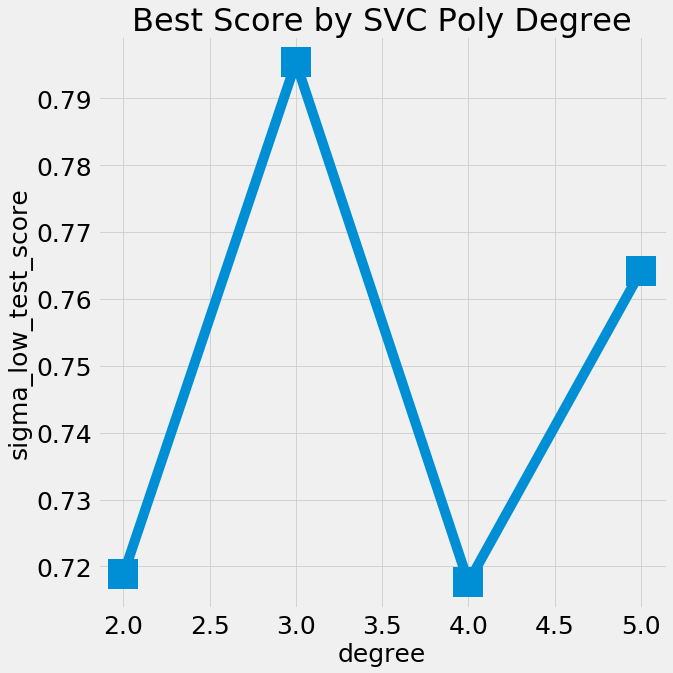

In [14]:
mod_df = mod_df.groupby('degree').agg({'sigma_low_test_score':np.max}).reset_index()

plt.figure(figsize=(plot_size,plot_size))
plt.plot(mod_df['degree'],mod_df['sigma_low_test_score'],marker='s')
plt.xlabel("degree")
plt.ylabel("sigma_low_test_score")
plt.title("Best Score by SVC Poly Degree")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'SVC_Poly_degree.png')
plt.show()


In [65]:
#Peter
mod_df = cp(summary_df)

mod_df['C'] = mod_df['params'].apply(lambda x: x.get('classifier__C',np.nan))
mod_df['N_components'] = mod_df['params'].apply(lambda x: x.get('feature__n_components',np.nan))

mod_df = mod_df.sort_values('sigma_low_test_score', ascending=False).drop_duplicates(['C'])

mod_df.loc[:,['C','N_components','sigma_low_test_score']]


# mod_df.groupby(['C','N_components']).agg({'sigma_low_test_score':np.max})

,C,N_components,sigma_low_test_score
488,1.00,0.0,0.825043
661,10.00,15.0,0.823802
830,100.00,20.0,0.823485
992,1000.00,0.0,0.823485
1165,10000.00,15.0,0.822269
323,0.10,5.0,0.819515
147,0.01,5.0,0.813200
6,NaN,20.0,0.744834


In [15]:
mod_df = cp(summary_df)
mod_df['kernal'] = mod_df['params'].apply(lambda x: x.get('classifier__kernel',np.nan))
mod_df['C'] = mod_df['params'].apply(lambda x: x.get('classifier__C',np.nan))
mod_df['gamma'] = mod_df['params'].apply(lambda x: x.get('classifier__gamma',np.nan))

c_curve = mod_df.groupby('C').agg({'sigma_low_test_score':np.max}).reset_index()
gamma_curve = mod_df.groupby('gamma').agg({'sigma_low_test_score':np.max}).reset_index()

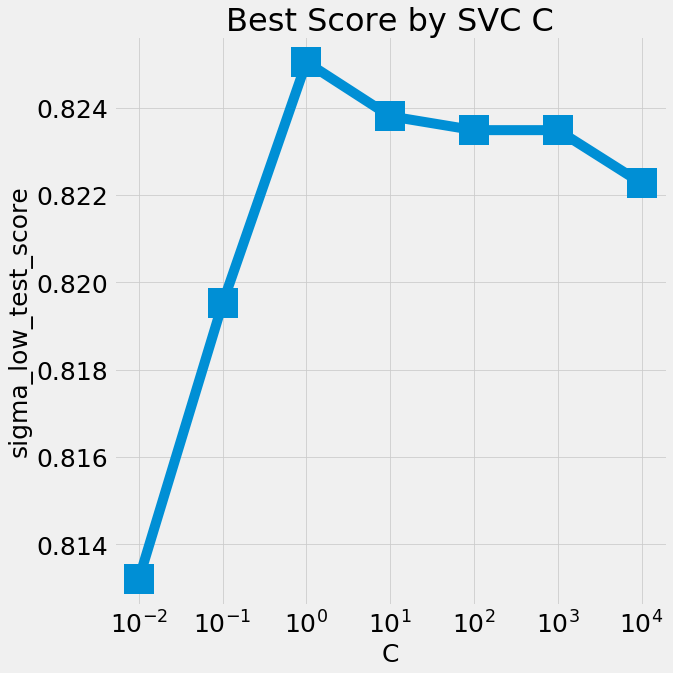

In [16]:
plt.figure(figsize=(plot_size,plot_size))
plt.semilogx(c_curve['C'],c_curve['sigma_low_test_score'],marker='s')
plt.xlabel("C")
plt.ylabel("sigma_low_test_score")
plt.title("Best Score by SVC C")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'SVC_C.png')
plt.show()


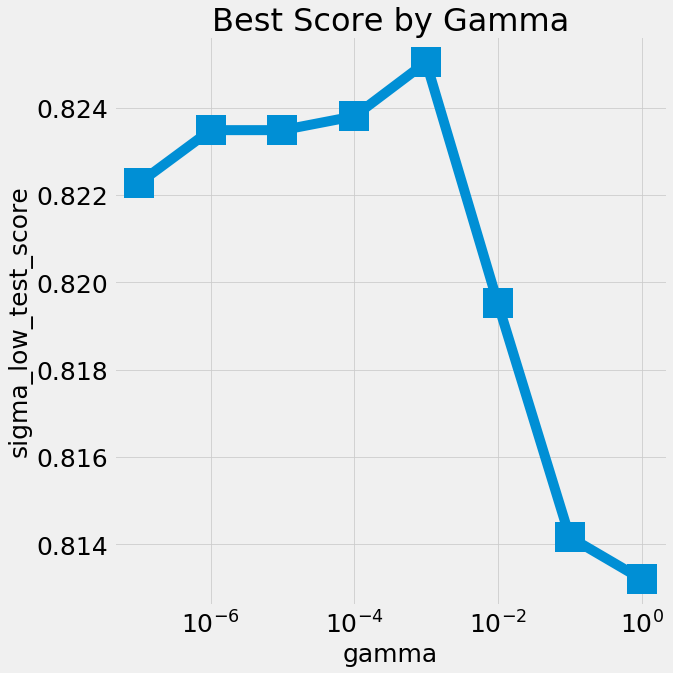

In [17]:
plt.figure(figsize=(plot_size,plot_size))
plt.semilogx(gamma_curve['gamma'],gamma_curve['sigma_low_test_score'],marker='s')
plt.xlabel("gamma")
plt.ylabel("sigma_low_test_score")
plt.title("Best Score by Gamma")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.savefig(plot_path + 'SVC_gamma.png')
plt.show()

In [18]:
summary_df.groupby('algorithum').agg({'rank':np.min,'sigma_low_test_score':np.max,'params':len})

,rank,sigma_low_test_score,params
algorithum,,,
GM,1849,0.543860,192
Perceptron_LDA,1244,0.669797,1
Perceptron_PCA,867,0.744834,8
SVC,0,0.825043,1344
SVC_poly,368,0.795381,1536


In [19]:
summary_df.shape

(3081, 9)

In [20]:
top = 10

for idx in range(top):
    print(summary_df.iloc[idx]['sigma_low_test_score'])
    print(summary_df.iloc[idx]['algorithum'])
    print(summary_df.iloc[idx]['params'])
    print('-----')


0.825042875469
SVC
{'classifier__C': 1.0, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf', 'feature__n_components': 0}
-----
0.825042875469
SVC
{'classifier__C': 1.0, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf', 'feature__n_components': 24}
-----
0.825042875469
SVC
{'classifier__C': 1.0, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf', 'feature__n_components': 20}
-----
0.823802275498
SVC
{'classifier__C': 10.0, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf', 'feature__n_components': 15}
-----
0.823485071223
SVC
{'classifier__C': 100.0, 'classifier__gamma': 1.0000000000000001e-05, 'classifier__kernel': 'rbf', 'feature__n_components': 20}
-----
0.823485071223
SVC
{'classifier__C': 1000.0, 'classifier__gamma': 9.9999999999999995e-07, 'classifier__kernel': 'rbf', 'feature__n_components': 0}
-----
0.823485071223
SVC
{'classifier__C': 100.0, 'classifier__gamma': 1.0000000000000001e-05, 'classifier__kernel': 'rbf', 'feature__n_components': 0}
-----
0.823

In [21]:
pipe = hdpo.get_paramater_grids(data_path)[summary_df.iloc[0]['algorithum']]['pipeline']
pipe.set_params(**summary_df.iloc[0]['params'] )

# pipe.set_params(classifier__class_weight={0:0.5,1:0.5})

/Users/peter/.virtualenvs/py3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/peter/.virtualenvs/py3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('cleaner', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_pipe', Pipeline(memory=None,
     steps=[('selector', ItemSelector(key_list=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])), ('Imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('s...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [22]:
this_df = cp(data_df)
# this_df = this_df[this_df['sex']==1.0]
this_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ispos_truth
pat_id,,,,,,,,,,,,,,
162,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,False
18,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,False
100,45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0,False
78,48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0.0,3.0,False
262,60.0,0.0,1.0,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,False


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array(this_df.iloc[:, :-1])
y = np.array(this_df['ispos_truth'])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=10)
for train_idx, validation_idx in sss.split(X, y):
    pass


pipe.fit(this_df.iloc[train_idx],this_df.iloc[train_idx]['ispos_truth'],)
pipe.score(this_df.iloc[validation_idx],this_df.iloc[validation_idx]['ispos_truth'])


2017-11-24 13:12:07,725|heart_disease.preprocessing|DEBUG|Fit Transform passthrough  PCA
2017-11-24 13:12:07,727|heart_disease.preprocessing|DEBUG|Pass through fit, does Nothing
2017-11-24 13:12:07,729|heart_disease.preprocessing|DEBUG|Pass through transform, does Nothing
2017-11-24 13:12:07,741|heart_disease.preprocessing|DEBUG|Pass through transform, does Nothing


0.8771929824561403

In [24]:
is_test = np.zeros(data_df.shape[0])

In [25]:
is_test[validation_idx] = 1

In [26]:
data_df['predictions'] = pipe.predict(data_df)
data_df['is_test'] = is_test
data_df['is_error'] = data_df['predictions']!=data_df['ispos_truth']

2017-11-24 13:12:07,819|heart_disease.preprocessing|DEBUG|Pass through transform, does Nothing


In [27]:
np.abs(data_df.corr())["is_error"].sort_values()

thal           0.001424
slope          0.004256
predictions    0.008820
restecg        0.011145
ca             0.012132
is_test        0.015036
oldpeak        0.019212
thalach        0.021210
trestbps       0.021635
chol           0.027948
fbs            0.038643
age            0.040530
ispos_truth    0.057973
cp             0.108349
exang          0.120340
sex            0.155953
is_error       1.000000
Name: is_error, dtype: float64

In [28]:
np.abs(data_df.corr())["sex"].sort_values()

is_test        0.001731
fbs            0.002656
cp             0.003674
ca             0.006487
restecg        0.026442
thalach        0.044649
age            0.066618
slope          0.071682
trestbps       0.084269
oldpeak        0.088574
exang          0.106640
is_error       0.155953
chol           0.256004
ispos_truth    0.265731
predictions    0.273127
thal           0.317346
sex            1.000000
Name: sex, dtype: float64

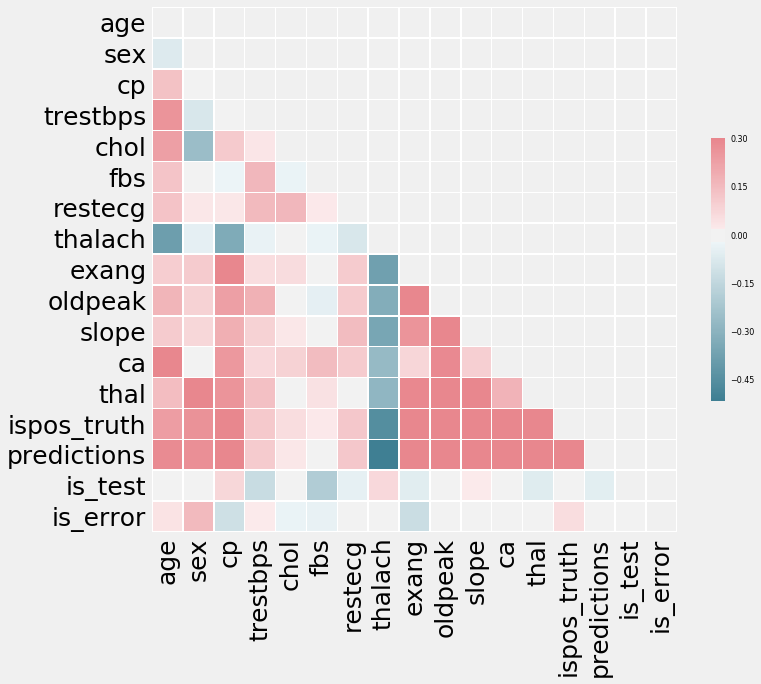

In [29]:
hdp.correlation_matrix(data_df)
plt.tick_params(labelsize=label_axissize)
plt.show()

In [30]:
error_df = data_df[data_df['is_error']]
error_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ispos_truth,predictions,is_test,is_error
pat_id,,,,,,,,,,,,,,,,,
124,65.0,1.0,1.0,138.0,282.0,1.0,2.0,174.0,0.0,1.4,2.0,1.0,3.0,True,False,0.0,True
33,59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0,False,True,0.0,True
274,59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,True,False,0.0,True
10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,False,True,0.0,True
92,62.0,1.0,3.0,130.0,231.0,0.0,0.0,146.0,0.0,1.8,2.0,3.0,7.0,False,True,0.0,True
66,60.0,1.0,3.0,140.0,185.0,0.0,2.0,155.0,0.0,3.0,2.0,0.0,3.0,True,False,1.0,True
32,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,True,False,1.0,True
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,False,True,0.0,True
184,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0,True,False,0.0,True


In [31]:
data_df.shape

(227, 17)

In [32]:
np.sum(data_df['ispos_truth'])/data_df.shape[0]

0.45814977973568283

In [33]:
np.sum(error_df['ispos_truth'])/error_df.shape[0]

0.53846153846153844

In [34]:
error_df.shape[0]

26

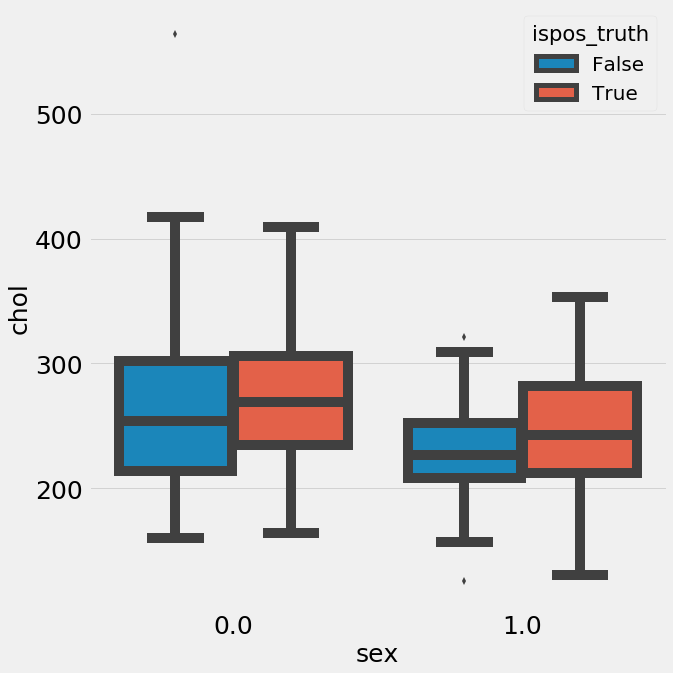

In [35]:
plt.figure(figsize=(plot_size,plot_size))
sns.boxplot(x="sex", y="chol", data=data_df, hue="ispos_truth")
plt.tick_params(labelsize=label_axissize)
plt.tight_layout()
plt.show()

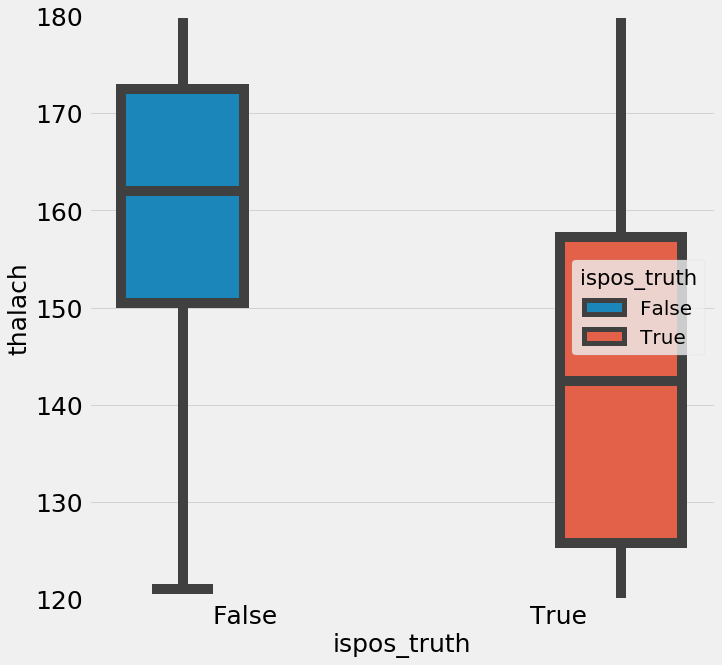

In [36]:
plt.figure(figsize=(plot_size,plot_size))
sns.boxplot(x="ispos_truth", y="thalach", data=data_df, hue="ispos_truth")
plt.tick_params(labelsize=label_axissize)
plt.ylim([120,180])
plt.show()

In [37]:

test = data_df.groupby(['sex','exang']).agg({'ispos_truth':np.sum,'thalach':len})

test.columns = ['numPos','total']
test['frac'] = test['numPos']/test['total']
test

numPos  total      frac
sex exang                         
0.0 0.0       9.0   55.0  0.163636
    1.0      10.0   17.0  0.588235
1.0 0.0      42.0  102.0  0.411765
    1.0      43.0   53.0  0.811321

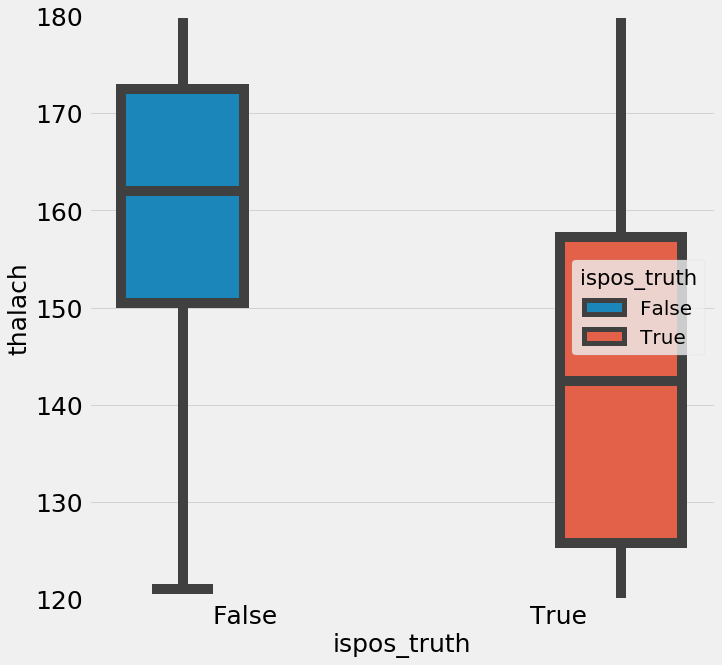

In [38]:
plt.figure(figsize=(plot_size,plot_size))
sns.boxplot(x="ispos_truth", y="thalach", data=data_df, hue="ispos_truth")
plt.ylim([120,180])
plt.tick_params(labelsize=label_axissize)
plt.show()

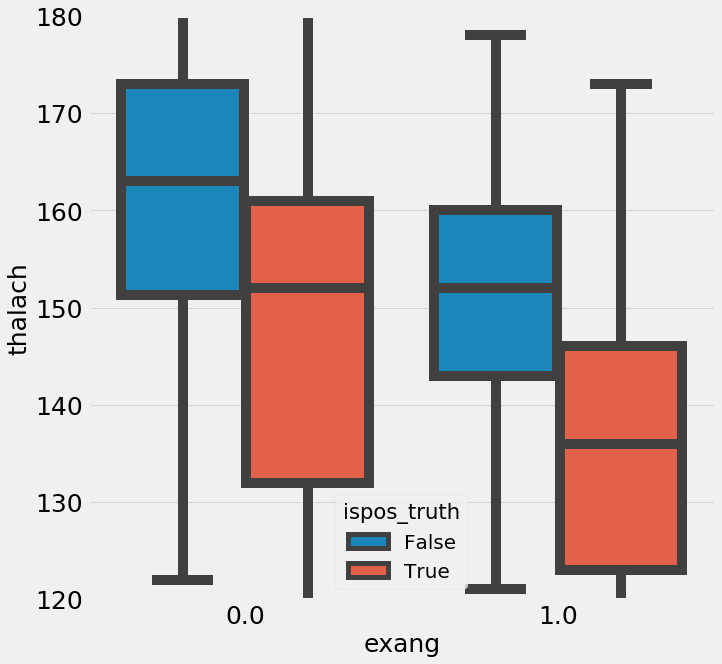

In [39]:
plt.figure(figsize=(plot_size,plot_size))
sns.boxplot(x="exang", y="thalach", data=data_df, hue="ispos_truth")
plt.ylim([120,180])
plt.tick_params(labelsize=label_axissize)
plt.show()

In [40]:
# Scatter by Gender 
gender_map = {0:'female',1:'male'}
data_df['sex'].apply(lambda x:gender_map[x])

truth_map = {False:'neg',True:'pos'}
data_df['ispos_truth'].apply(lambda x:truth_map[x])

data_df['comba'] = data_df['ispos_truth'].apply(lambda x:gender_map[x]) + data_df['sex'].apply(lambda x:truth_map[x])

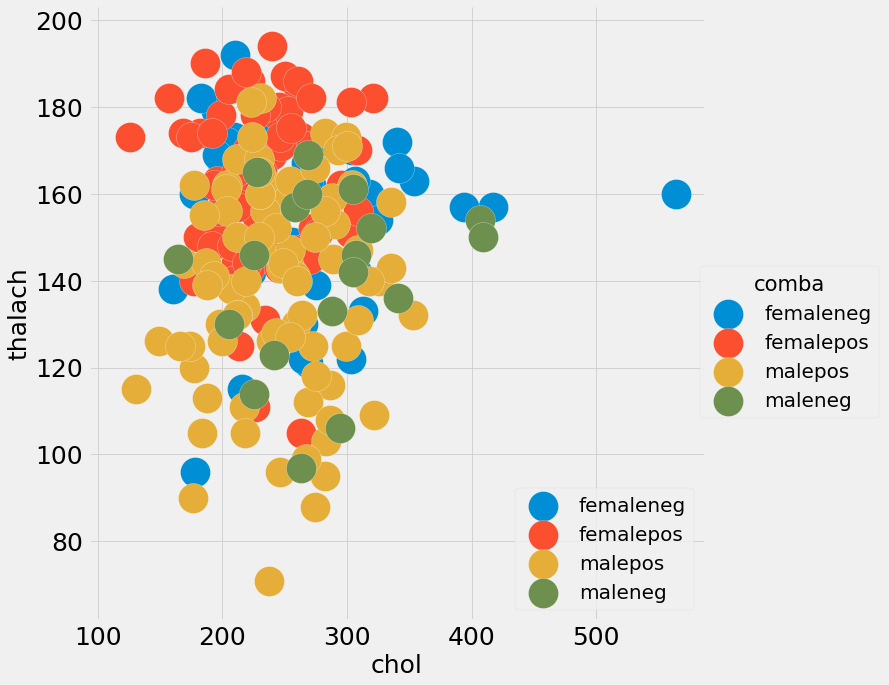

In [41]:
sns.pairplot(x_vars=["chol"], y_vars=["thalach"], data=data_df, hue="comba", size=plot_size)
plt.legend(loc='lower right')
plt.tick_params(labelsize=label_axissize)
plt.show()

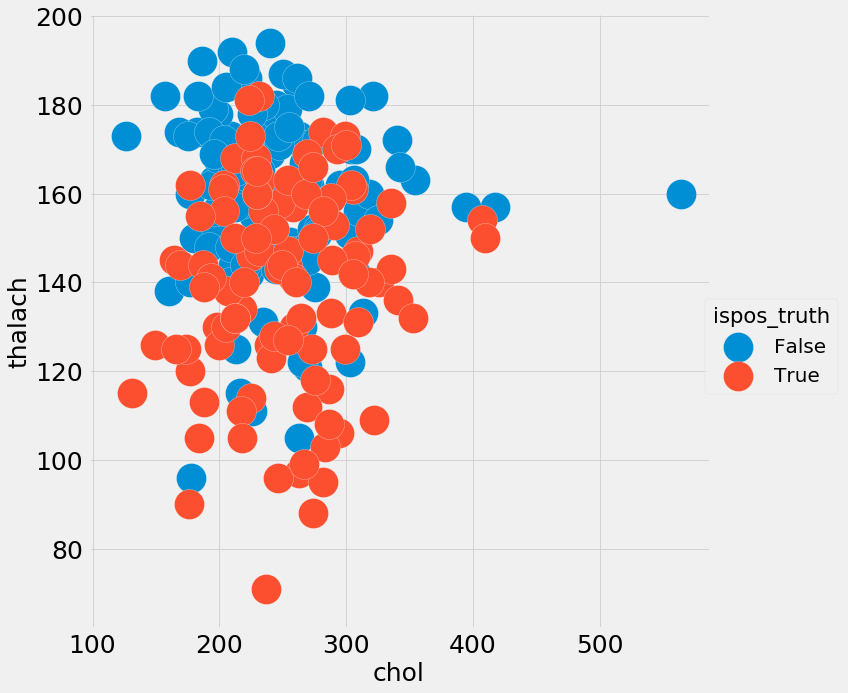

In [42]:
sns.pairplot(x_vars=["chol"], y_vars=["thalach"], data=data_df, hue="ispos_truth", size=plot_size)
plt.tick_params(labelsize=label_axissize)
plt.show()

In [43]:
diff_by_gender = data_df.groupby('sex').agg([np.mean, np.std]).transpose()

In [44]:
diff_by_gender['diff']=np.abs((diff_by_gender[0]-diff_by_gender[1])/(diff_by_gender[0]+diff_by_gender[0]))
diff_by_gender.sort_values(by='diff',ascending=False)
# diff_by_gender

,sex,0.0,1.0,diff
is_error,mean,0.041667,0.148387,1.280645
predictions,mean,0.250000,0.541935,0.583871
ispos_truth,mean,0.263889,0.548387,0.539049
is_error,std,0.201229,0.356636,0.386145
exang,mean,0.236111,0.341935,0.224099
chol,std,67.623972,43.341995,0.179537
thal,mean,3.887324,5.220779,0.171513
oldpeak,mean,0.904167,1.132903,0.126490
thalach,std,19.502257,24.364946,0.124670
cp,std,0.839181,1.007429,0.100245


In [45]:
feature_in = 'thalach'

In [46]:
np.mean(data_df[data_df['sex']==1][feature_in])

149.80645161290323

In [47]:
def add_gender_based_feature(data_df, feature_in):
    male_mean = np.mean(data_df[data_df['sex']==1][feature_in])
    male_std = np.std(data_df[data_df['sex']==1][feature_in])

    female_mean = np.mean(data_df[data_df['sex']==0][feature_in])
    female_std = np.std(data_df[data_df['sex']==0][feature_in])

    out = np.zeros_like(data_df[feature_in])

    for idx, (sex, feat) in enumerate(zip(data_df['sex'],data_df[feature_in])):
        if sex == 1:
            out[idx] = (feat-male_mean)/male_std
        elif sex==0:
            out[idx] = (feat-female_mean)/female_std
        else:
            raise(ValueError('Unknown Gender {}'.format(sex)))  
            
    return out

In [48]:
data_df['gender_chol'] = add_gender_based_feature(data_df, 'chol')
data_df['gender_thalach'] = add_gender_based_feature(data_df, 'thalach')

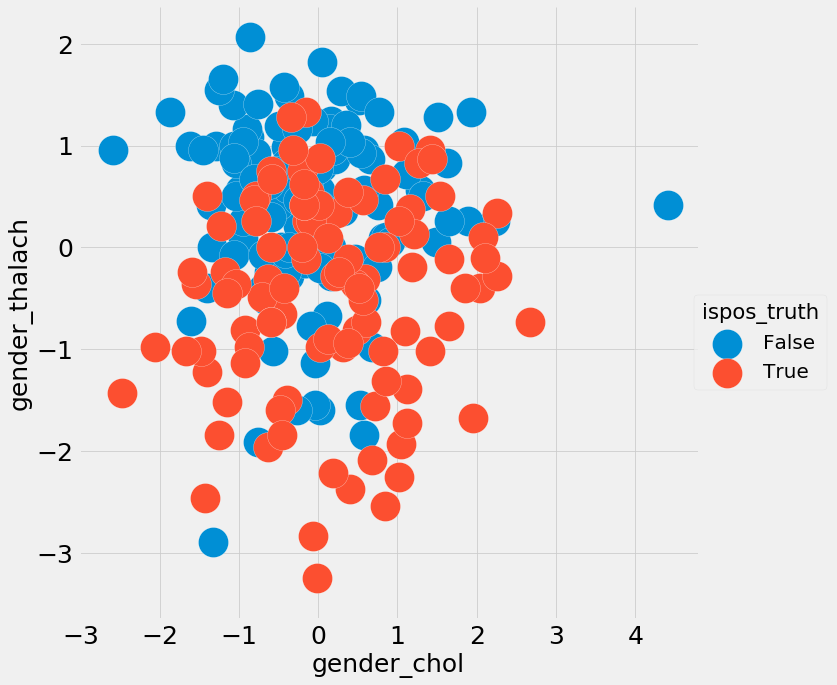

In [49]:
sns.pairplot(x_vars=["gender_chol"], y_vars=["gender_thalach"], data=data_df, hue="ispos_truth", size=plot_size)
plt.tick_params(labelsize=label_axissize)
plt.show()

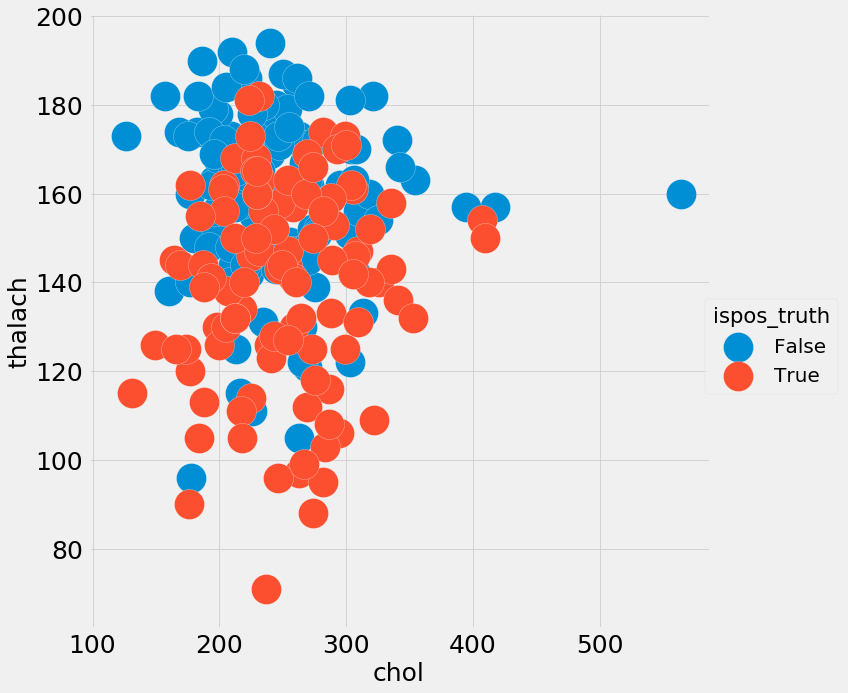

In [50]:
sns.pairplot(x_vars=["chol"], y_vars=["thalach"], data=data_df, hue="ispos_truth", size=plot_size)
plt.tick_params(labelsize=label_axissize)
plt.show()

In [51]:
out_df = cp(data_df)

for feat in ['exang']:
    out_df[feat]=add_gender_based_feature(data_df,feat)
out_df['ispos_truth'] = list(data_df['ispos_truth'])


# out_df['exang'] = data_df['exang']*data_df['sex']
# out_df['sex'] = data_df['exang']*(1-data_df['sex'])

In [52]:
pipe = hdpo.get_paramater_grids(data_path)[summary_df.iloc[0]['algorithum']]['pipeline']
pipe.set_params(**summary_df.iloc[0]['params'] )

from sklearn.model_selection import StratifiedShuffleSplit

X = np.array(out_df.iloc[:, :-1])
y = np.array(out_df['ispos_truth'])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=10)
for train_idx, validation_idx in sss.split(X, y):
    pass


pipe.fit(out_df.iloc[train_idx],out_df.iloc[train_idx]['ispos_truth'],)
pipe.score(out_df.iloc[validation_idx],out_df.iloc[validation_idx]['ispos_truth'])

/Users/peter/.virtualenvs/py3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/peter/.virtualenvs/py3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
2017-11-24 13:12:13,204|hear

0.8771929824561403

In [53]:
out_df['predictions'] = pipe.predict(out_df)
out_df['is_error'] = data_df['predictions']!=data_df['ispos_truth']

2017-11-24 13:12:13,244|heart_disease.preprocessing|DEBUG|Pass through transform, does Nothing


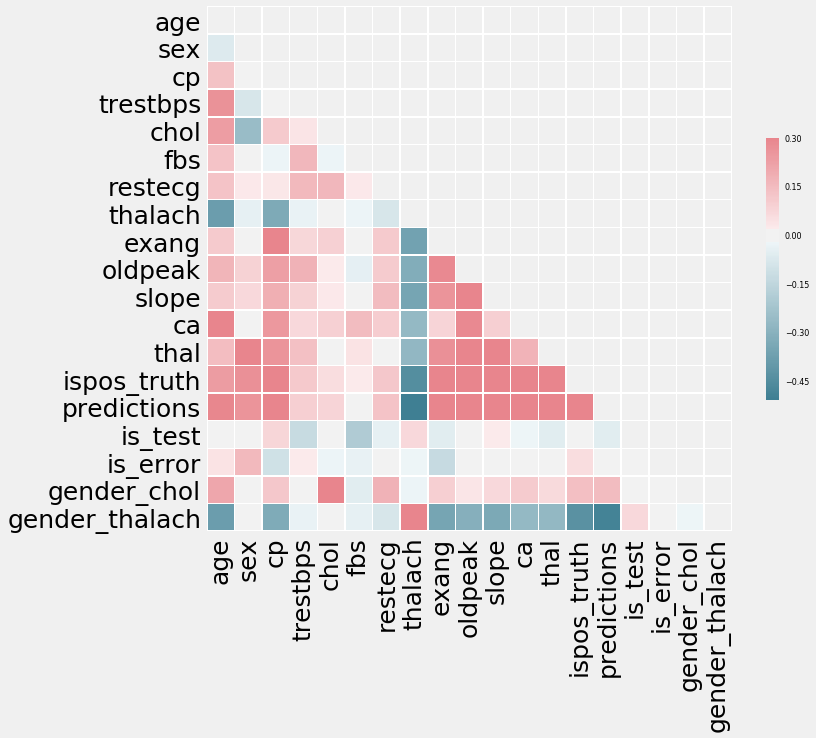

In [54]:
hdp.correlation_matrix(out_df)
plt.tick_params(labelsize=label_axissize)
plt.show()

In [55]:
np.abs(out_df.corr()['is_error']).sort_values(ascending=False)

is_error          1.000000
sex               0.155953
exang             0.135767
cp                0.108349
ispos_truth       0.057973
age               0.040530
fbs               0.038643
chol              0.027948
trestbps          0.021635
thalach           0.021210
oldpeak           0.019212
gender_thalach    0.016451
is_test           0.015036
ca                0.012132
restecg           0.011145
predictions       0.005630
slope             0.004256
thal              0.001424
gender_chol       0.000659
Name: is_error, dtype: float64

In [56]:
np.abs(data_df.corr()['is_error']).sort_values(ascending=False)

is_error          1.000000
sex               0.155953
exang             0.120340
cp                0.108349
ispos_truth       0.057973
age               0.040530
fbs               0.038643
chol              0.027948
trestbps          0.021635
thalach           0.021210
oldpeak           0.019212
gender_thalach    0.016451
is_test           0.015036
ca                0.012132
restecg           0.011145
predictions       0.008820
slope             0.004256
thal              0.001424
gender_chol       0.000659
Name: is_error, dtype: float64